In [130]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
def init(dimension):
    param = {}
    c = len(dimension)
    np.random.seed(1)

    for i in range(1,c): # +1
        param[f'W{i}'] = np.random.randn(dimension[i], dimension[i-1])
        param[f'b{i}'] = np.random.randn(dimension[i], 1)
    return c-1,param

In [132]:
def forward_propagation(X,param,c):
    acti = {'A0' : X}
    for i in range(1,c+1):
        Z = param[f'W{i}'].dot(acti[f'A{i-1}']) + param[f'b{i}']
        acti[f'A{i}'] = 1/(1+np.exp(-Z))
    return acti

In [133]:
def back_propagatio(X,y,acti,param,c):
    gradients = {}
    dZ = acti[f'A{c}'] - y
    for i in reversed(range(1,c+1)):
        gradients[f'dW{i}'] = 1/y.shape[1] * dZ.dot(acti[f'A{i-1}'].T)
        gradients[f'db{i}'] = 1/y.shape[1] * np.sum(dZ, axis=1,keepdims=True)
        if c > 1:
            dZ = np.dot(param[f'W{i}'].T, dZ) * acti[f'A{i-1}'] * (1 - acti[f'A{i-1}'])    
    return gradients

In [134]:
def update(gradients, param,learning_rate,c):
    for i in range(1,c+1):
        param[f'W{i}'] = param[f'W{i}'] - learning_rate * gradients[f'dW{i}']
        param[f'b{i}'] = param[f'b{i}'] - learning_rate * gradients[f'db{i}']
    return param

In [135]:
def predict(X,param,c):
    acti = forward_propagation(X, param,c)
    return acti[f'A{c}'] >= 0.5

In [136]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from tqdm import tqdm

In [137]:
def neural_network(X_train,y_train,hidden_layers = (16,16,16),learning_rate=0.1,n_iter=100):
#def neural_network(X_train,y_train,X_test,y_test,n1,learning_rate=0.1,n_iter=100):
    dimension = list(hidden_layers)
    dimension.insert(0,X_train.shape[0])
    dimension.append(y_train.shape[0])
    #np.random.seed(0)
    c,param = init(dimension)
    
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        acti = forward_propagation(X_train, param,c)
        gradients = back_propagatio(X_train,y_train,acti,param,c)
        param = update(gradients,param,learning_rate,c)
        if i%10 == 0:
            train_loss.append(log_loss(y_train.flatten(), acti[f'A{c}'].flatten()))
            train_acc.append((accuracy_score(y_train.flatten(),predict(X_train, param,c).flatten())))
            
            #A_test = forward_propagation(X_test,param)
            #test_loss.append(log_loss(y_test, A_test['A2']))
            #test_acc.append((accuracy_score(y_test.flatten(),predict(X_test, param,c).flatten())))
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    #plt.plot(test_loss, label='test loss')
    #plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    #plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()
    return param
    

In [138]:
def modifneural_network(X_train,y_train,X_test,y_test,hidden_layers = (16,16,16),learning_rate=0.1,n_iter=100):
    dimension = list(hidden_layers)
    dimension.insert(0,X_train.shape[0])
    dimension.append(y_train.shape[0])
    #np.random.seed(0)
    c,param = init(dimension)
    
    train_loss = []
    train_acc = []
    test_loss = []
    test_acc = []

    for i in tqdm(range(n_iter)):
        acti = forward_propagation(X_train, param,c)
        gradients = back_propagatio(X_train,y_train,acti,param,c)
        param = update(gradients,param,learning_rate,c)
        if i%10 == 0:
            train_loss.append(log_loss(y_train.flatten(), acti[f'A{c}'].flatten()))
            train_acc.append((accuracy_score(y_train.flatten(),predict(X_train, param,c).flatten())))
            
            A_test = forward_propagation(X_test,param,c)
            test_loss.append(log_loss(y_test, A_test[f'A{c}']))
            test_acc.append((accuracy_score(y_test.flatten(),predict(X_test, param,c).flatten())))
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.legend()
    plt.show()
    return param

In [139]:
from sklearn.datasets import make_circles


In [140]:
X, y = make_circles(n_samples=200, noise=0.1,factor=0.3,random_state=0)
X = X.T
y = y.reshape((1,y.shape[0]))

#plt.scatter(X[0,:],X[1,:], c=y,cmap='summer')
#plt.show()

100%|██████████| 3000/3000 [00:03<00:00, 876.86it/s]


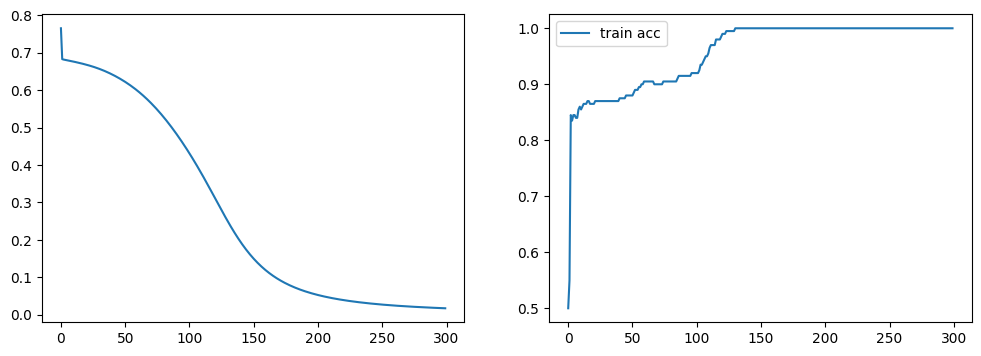

{'W1': array([[ 3.53973431, -0.12445752],
        [-0.73309495, -0.19562053],
        [ 0.96908073, -3.49943566],
        [ 2.07805596, -0.21903765],
        [ 1.56822476, -0.68440054],
        [ 1.63490008, -2.13298846],
        [-1.21196003, -2.04169203],
        [ 2.35921157, -1.49180883],
        [-1.30357063, -1.72100751],
        [-0.07218176,  2.12581875],
        [-1.09921974,  1.88594507],
        [ 2.43995909,  1.25974469],
        [ 1.64631997, -1.67659737],
        [-1.37626129, -2.5106564 ],
        [-0.81537761,  0.58053147],
        [-0.96736671, -0.31136383]]),
 'b1': array([[-1.73839425],
        [-0.6736443 ],
        [-1.80794183],
        [-0.4701613 ],
        [-1.17538407],
        [ 0.36381522],
        [ 1.41822998],
        [ 1.46205279],
        [ 0.11783978],
        [-0.54377697],
        [-0.66042941],
        [ 1.50602373],
        [ 1.07304459],
        [-1.43807145],
        [ 0.04906816],
        [ 2.20455348]]),
 'W2': array([[-3.80393717e-01,  6.23834

In [141]:
neural_network(X,y,(16,16,16),0.1,3000)

In [142]:
from utilities import *

In [143]:
X_train, y_train, X_test, y_test = load_data()

In [144]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max()
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_train.max()

In [145]:
X_train_reshape = X_train_reshape.T
X_test_reshape = X_test_reshape.T
y_train = y_train.T
y_test = y_test.T

100%|██████████| 1000/1000 [03:51<00:00,  4.32it/s]


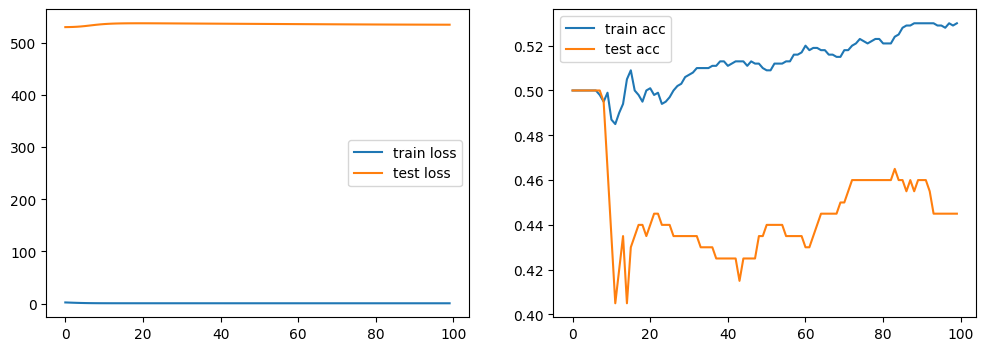

{'W1': array([[ 1.62446194, -0.6116283 , -0.52797253, ..., -1.47841209,
         -0.49231816,  0.79539638],
        [-1.09280447,  2.08589922,  1.31544429, ..., -0.61485481,
          1.35249735,  0.53004653],
        [-0.6503429 ,  2.28461707, -0.54110663, ..., -0.52734069,
         -0.38047676,  0.94927678],
        ...,
        [-0.55221068,  0.27418219,  1.63084835, ...,  1.8683795 ,
          0.3685146 , -0.584612  ],
        [-1.12955391, -0.68021581,  0.3041938 , ...,  0.36926277,
          1.03228348, -0.89686438],
        [ 0.4865511 ,  0.34868917, -0.08615346, ..., -0.6677079 ,
          0.6341913 ,  1.20156837]]),
 'b1': array([[ 0.97879291],
        [ 0.65888458],
        [ 1.46457328],
        [ 0.832157  ],
        [-0.62801059],
        [ 1.18103422],
        [ 0.56120618],
        [ 0.61627395],
        [-0.70537272],
        [-0.01255251],
        [-0.56691363],
        [-0.79984371],
        [-0.5038564 ],
        [-0.06617122],
        [-0.22614058],
        [ 0.9450

In [148]:
modifneural_network(X_train_reshape, y_train, X_test_reshape, y_test,(16,16,16),0.01,1000)